In [2]:
from pymongo import MongoClient
from pprint import pprint
import igraph
import numpy as np
import scipy
import pandas as pd
import sys
import pymongo
import gensim
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from html import unescape
 

try:
    client = MongoClient('localhost', 27017) # host, port
except ConnectionFailure as e:
    sys.stderr.write("Could not connect to MongoDB: %s" % e)
    sys.exit(1)

c:\users\stagiaire2014\miniconda3\envs\deepscience\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# get database with all tweets
db = client.tweets_database

#client.tweets_database.filtered_tweets_noRetweets_english.drop()


filtered_noRetweets_english_onlyPersonal = client.tweets_database.filtered_noRetweets_english_onlyPersonal

client.tweets_database.collection_names()

import sys
path = 'D:\A_AHNE1\Tweet-Classification-Diabetes-Distress\preprocess'

if path not in sys.path:
    sys.path.insert(0, path)
sys.path

from preprocess import Preprocess
prep = Preprocess()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stagiaire2014\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stagiaire2014\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stagiaire2014\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
filepath = "sample_tweets.txt"

i = 0
with open(filepath, "w") as f:
    for tweet in filtered_noRetweets_english_onlyPersonal.find():
        #print(tweet["text"])

        tweet = tweet["text"]
        tweet = prep.replace_contractions(tweet)
        tweet = prep.replace_hashtags_URL_USER(tweet, mode="delete")
        tweet = prep.tokenize(tweet)
        tweet = prep.remove_punctuation(tweet)

        tweet = prep.preprocess_emojis(tweet)
        tweet = prep.preprocess_emoticons(tweet)
        tweet = prep.remove_non_ascii(tweet)
        tweet = prep.to_lowercase(tweet)

        tweet = prep.remove_stopwords(tweet)
        tweet = prep.lemmatize_verbs(tweet)
        tweet = prep.stem_words(tweet)
        tweet = [ x for x in tweet if x not in ["diabet", "glucos", "insulin", "type", "1", "2", "", "get", "sugar", "would",
                                          "go", "know", "take", "give", "say", "one", "could", "would", "people", "look",
                                          "year", "test", "see", "oh", "via", "bitch", "daddi", "hi", "w", "b", "n", "c",
                                          "ii", "dr", "rt", "bc", "ok", "think", "make"] ]
        tweet = ' '.join(tweet)
        tweet = tweet+"\n"
        #print(tweet)
        #print("")

        f.write(tweet)
        
        i += 1
        
        #if i == 1000:
        #    break
        if i % 10000 == 0:
            print(i)
    




INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji 🔙 -> delete emoji :BACK_arrow:
INFO: No category set for emoji 🔛 -> delete emoji :ON!_arrow:
INFO: No category set for emoji 🔝 -> delete emoji :TOP_arrow:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: Could not replace emoticon: :3 of the word: 9:30 (<class 'KeyError'>, KeyError('9:30',), <traceback object at 0x00000000153C7888>)
INFO: No category set for emoji ↪ -> delete emoji :left_arrow_curving_right:
INFO: No category set for emoji ↩ -> delete emoji :right_arrow_curving_left:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: Could not replace 

INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x0000000015A57748>)
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set fo

INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: Could not replace emoticon: ) of the word: ;-) (<class 'KeyError'>, KeyError(';-)',), <traceback object at 0x000000001BFD36C8>)
INFO: Could not replace emoticon: Dx of the word: Dx (<class 'KeyError'>, KeyError('Dx',), <traceback object at 0x000000001BFDF208>)


INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😴 -

INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🥊 -> delete emoji :boxing_glove:
INFO: No category set for emoji 🥊 -> delete emoji :boxing_glove:
INFO: No category set for emoji 🥊 -> delete emoji :boxing_glove:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 💀 -> delete emoji :sku

INFO: No category set for emoji 🍅 -> delete emoji :tomato:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤦 -> delete emoji :p

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤘 -> delete emoji :sign_of_the_horns:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: Could not replace emoticon: :3 of the word: 1:3

INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x0000000015F62048>)
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji ❣ -> delete emoji :heavy_heart_exclamation:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji ✋ -> delete emoji :raised_hand:
INFO: No category set for emoji 🏻 -> delete

INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 🌞 -> delete emoji :sun_with_face:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🐥 -> delete emoji :front-facing_baby_chick:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-ou

INFO: No category set for emoji 📉 -> delete emoji :chart_decreasing:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: Could not replace emoticon: xD of the word: xD (<class 'KeyError'>, KeyError('xD',), <traceback object at 0x00000000182C5388>)
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji ⤵ -> delete emoji :right_arrow_curving_down:
INFO: No category set for emoji ⤵ -> delete emoji :right_arrow_curving_down:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji 🐲 -> delete emoji :dragon_face:
INFO: No category set for 

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:

INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No cate

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ⌚ -> delete emoji :watch:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set fo

INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 💦 -> delete emoji :sweat_droplets:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoj

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji 

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: Could not replace emoticon: ) of the word: (571)7570984 (<class 'KeyError'>, KeyError('(571)7570984',), <traceback object at 0x0000000015C3C048>)
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_e

INFO: Could not replace emoticon: :3 of the word: 16:35 (<class 'KeyError'>, KeyError('16:35',), <traceback object at 0x00000000156B5248>)
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🥊 -> delete emoji :boxing_glove:
INFO: No category set for emoji 😨 -> delete emoji :fearful_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category

INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: Could not replace emoticon: xd of the word: xdrip (<class 'KeyError'>, KeyError('xdrip',), <traceback object at 0x000000001B8C8CC8>)
INFO: Could not replace emoticon: xd of the word: xdrip (<class 'KeyError'>, KeyError('xdrip',), <traceback object at 0x00000000154458C8>)
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO:

INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x00000000177C1708>)
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x0000000015C77148>)
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x0000000015C752C8>)
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x0000000015C78BC8>)
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x0000000015C72648>)
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, 

INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😦 -> delete emoji :frowning_face_with_open_mouth:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 🍪 -> delete emoji :cookie:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 💦 -> delete emoji :sweat_droplets:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤷 -> dele

INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
40000
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category s

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 👣 -> delete emoji :footprints:
INFO: No category set for emoji 🔪 -> delete emoji :kitchen_knife:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face

INFO: No category set for emoji 🍟 -> delete emoji :french_fries:
INFO: No category set for emoji 🍟 -> delete emoji :french_fries:
INFO: No category set for emoji 🌮 -> delete emoji :taco:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🤙 -

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: Could not replace emoticon: t.T of the word: it.They (<class 'KeyError'>, KeyError('it.They',), <traceback object at 0x0000000018A95188>)
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🚮 -> delete emoji :litter_in_bin_sign:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🚮 -> delete emoji :litter_in_bin_sign:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😩 -> delet

INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_sui

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤙 -> delete emoji :call_me_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: Could not replace emoticon: DX of the word: NDX (<class 'KeyError'>, KeyError('NDX',), <traceback object at 0x00000000184F9488>)
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set 

INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 🍏 -> delete emoji :green_apple:
INFO: No category set for emoji 🥕 -> delete emoji :carrot:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No c

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🔫 -> delete emoji :pistol:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No ca

INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🌹 -> delete emoji :rose:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x0000000015C06548>)
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🍔 -> delete emoji :hamburger:
INFO: No category set for emoji 🥞 -> delete emoji :pancakes:
INFO: No category set for emoji 🥙 -> delete emoji :stuffed_flatbread:
INFO: No category set for emoji 🥓 -> delete emoji :bacon:
INFO: No category set for emoji 🍟 -> delete emoji :french_fries:
INFO: No category set for emoji 🐮 -> delete emoji :cow_face:
INFO: No category set for emoji 😼 -> delete emoji :cat_face_with_wry_smile:
INFO: No category set for emoji 🐀 -> delete emoji :rat:
INFO: No category set for emoji 🐭 -> delete emoji :mouse_face:
INFO: No category set for emoji 🐁 ->

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🙆 -> delete emoji :person_g

INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 🍓 -> delete emoji :strawberry:
INFO: No category set for emoji ⁉ -> delete emoji :exclamation_question_mark:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👨 -> delete emoji :man:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 💻 -> delete emoji :laptop_computer:
INFO: No category set for emoji 👎 -> delete emoji :thumbs_down:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🎥 -> delete emoji :movie_camera:
INFO: No category set for emoji 📼 -> delete emoji :videocassette:
INFO: No category set for emoji 📷 -> delete em

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🚴 -> delete emoji :person_biking:
INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👊 -> delete 

INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji 👹 -> delete emoji :ogre:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError'>, KeyError('8:',), <traceback object at 0x0

INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: Could not replace emoticon: :3 of the word: 11:30 (<class 'KeyError'>, KeyError('11:30',), <traceback 

INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🔍 -> delete emoji :left-pointing_magnifying_glass:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 🔍 -> delete emoji :left-pointing_magnifying_glass:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🐖 -> delete emoji :pig:
INFO: No category set for emoji 🐖 -> delete emoji :pig:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😜 -

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 🍔 -> delete emoji :hamburger:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 🍔 -> delete emoji :hamburger:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emo

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: Could not replace emoticon: :3 of the word: 9:30 (<class 'KeyError'>, KeyError('9:30',), <traceback object at 0x000000001C095148>)
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👁 -> delete emoji :eye:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> de

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set fo

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No categor

INFO: No category set for emoji 🌓 -> delete emoji :first_quarter_moon:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 🌓 -> delete emoji :first_quarter_moon:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 🌖 -> delete emoji :waning_gibbous_moon:
INFO: No category set for emoji 🌈 -> delete emoji :rainbow:
INFO: No category set for emoji 🌦 -> delete emoji :sun_behind_rain_cloud:
INFO: No category set for emoji 🌩 -> delete emoji :cloud_with_lightning:
INFO: No category set for emoji 🌟 -> delete emoji :glowing_star:
INFO: No category set for emoji 🌩 -> delete emoji :cloud_with_lightning:
INFO: No category set for emoji 🌟 -> delete emoji :glowing_star:
INFO: No category set for emoji ☁ -> delete emoji :cloud:
INFO: No category set for emoji ☄ -> delete emoji :comet:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 🌥 -> delete emoji :sun_behind_large_cloud:
INF

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 💦 -> delete emoji :sweat_droplets:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: Could not replace emoticon: :3 of the word: 7:30 (<class 'KeyError'>, KeyError('7:30',), <traceback object at 0x0000000017C52388>)
INFO: N

INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 🍪 -> delete emoji :cookie:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🔫 -> delete emoji :pistol:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🤝 -> delete emoji :handshake:
IN

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: Could not replace emoticon: xD of the word: xD (<class 'KeyError'>, KeyError('xD',), <traceback object at 0x0000000018A690C8>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🙅 -> delete emoji :per

INFO: Could not replace emoticon: :3 of the word: 6:30 (<class 'KeyError'>, KeyError('6:30',), <traceback object at 0x000000001DAB4688>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: Could not replace emoticon: :3 of the word: 4:30 (<class 'KeyError'>, KeyError('4:30',), <traceback object at 0x0000000015F36688>)
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤔 -> delet

INFO: Could not replace emoticon: : of the word: <:: (<class 'KeyError'>, KeyError('<::',), <traceback object at 0x0000000018AA1C48>)
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No categor

INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x00000000157B3148>)
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😌 -> delete emoji :rel

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: Could not replace emoticon: :3 of the word: 16:30 (<class 'KeyError'>, KeyError('16:30',), <traceback object at 0x000000001845D588>)
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🏃 -> delete emoji :person_running:
INFO: No category set for emoji 👨 -> delete emoji :man:
INFO: No category set for emoji 🏫 -> delete emoji :school:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🍞 -> delete emoji :bread:
INFO: No category set for em

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for 

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🚽 -> delete emoji :toilet:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO:

INFO: No category set for emoji 🚀 -> delete emoji :rocket:
INFO: No category set for emoji 🚀 -> delete emoji :rocket:
INFO: No category set for emoji 🚀 -> delete emoji :rocket:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set fo

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 📷 -> delete emoji :camera:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🎧 -> delete emoji :headphone:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 🚴 -> delete emoji :person_biking:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😶 -> delete emoji 

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 😯 -> delete emoji :hushed_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
I

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🆒 -> delete emoji :COOL_button:
INFO: No category set for emoji 🆗 -> delete emoji :OK_button:
INFO: No category set for emoji ⏫ -> delete emoji :fast_up_button:
INFO: No category set for emoji ⭐ -> delete emoji :white_medium_star:
INFO: No category set for emoji 🌈 -> delete emoji :rainbow:
INFO: No category set for emoji 💝 -> delete emoji :heart_with_ribbon:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🐶 -> delete emoji :dog_face:
INFO: No category set for emoji 🐶 -> delete emoji :dog_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INF

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x000000001B8C3288>)
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 🐮 -> delete emoji :cow_face:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: Could not replace emoticon: :3 of the word: 5:30 (<class 'KeyE

INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for em

INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji 🍚 -> delete emoji :cooked_rice:
INFO: No cate

INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🐝 -> delete emoji :honeybee:
INFO: No category set for emoji 📽 -> delete emoji :film_projector:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍕 -> delete emoji :pizza:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji 🔽 -> delete emoji :down_button:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No categor

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :left_arrow:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🍔 -> delete emoji :hamburger:
INFO: No category set for emoji 🌭 -> delete emoji :hot_dog:
INFO: No category set for emoji 🍕 -> delete emoji :pizza:
INFO: No category set for emoji 🌮 -> delete emoji :taco:
INFO: No category set for emoji 🍟 -> delete emoji :french_fries:
INFO: No category set for emoji 🥞 -> delete emoji :pancakes:
INFO: No category set fo

INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 😨 -> delete emoji :fearful_face:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ✋ -> delete emoji :raised_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: Could 

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 👮 -> delet

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError'>, KeyError('8:',), <traceback object at 0x000000001ACA3108>)
INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError

INFO: No category set for emoji 🥂 -> delete emoji :clinking_glasses:
INFO: No category set for emoji 🍻 -> delete emoji :clinking_beer_mugs:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
I

INFO: No category set for emoji 🍿 -> delete emoji :popcorn:
INFO: No category set for emoji 🍿 -> delete emoji :popcorn:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: Could not replace emoticon: Dx of the word: Dx (<class 'KeyError'>, KeyError('Dx',), <traceback object at 0x000000001B139A48>)
INFO: No category set for emoji 🌞 -> delete emoji :sun_with_face:
INFO: No category 

INFO: Could not replace emoticon: :3 of the word: 4:32 (<class 'KeyError'>, KeyError('4:32',), <traceback object at 0x0000000014289FC8>)
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👽 -> delete emoji :alien:
INFO: No category set for emoji 👹 -> delete emoji :ogre:
INFO: No category set for emoji ☕ -> delete emoji :hot_beverage:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No categor

INFO: No category set for emoji 🍨 -> delete emoji :ice_cream:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍪 -> delete emoji :cookie:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x000000001ADED048>)
INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x0000

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: Could not replace emoticon: :3 of the word: 6:30 (<class 'KeyError'>, KeyError('6:30',), <traceback object at 0x000000001D6173C8>)
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😔 -> delete emoji :pensive_fa

INFO: No category set for emoji 🥘 -> delete emoji :shallow_pan_of_food:
INFO: No category set for emoji 🥘 -> delete emoji :shallow_pan_of_food:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 📚 -> delete emoji :books:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand

INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🚀 -> delete emoji :rocket:
INFO: Could not replace emoticon: : of the word: (: (<class 'KeyError'>, KeyError('(:',), <traceback object at 0x0000000018720808>)
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_ski

INFO: No category set for emoji 🦄 -> delete emoji :unicorn_face:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🎤 -> delete emoji :microphone:
INFO: No category set for emoji 🎼 -> delete emoji :musical_score:
INFO: No category set for emoji 👁 -> delete emoji :eye:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for

INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🍉 -> delete emoji :watermelon:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: No ca

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 👃 -> delete emoji :nose:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji ☕ -> delete emoji :hot_beverage:
INFO: No category set for emoji ☕ -> delete emoji :hot_beverage:
INFO: No ca

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: Could not replace emoticon: 0:3 of the word: 10:30 (<class 'KeyError'>, KeyError('10:30',), <traceback object at 0x000000001AF93088>)
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 🎥 -> delete emoji :movie_camera:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
I

INFO: Could not replace emoticon: :3 of the word: 15:32 (<class 'KeyError'>, KeyError('15:32',), <traceback object at 0x000000001B033188>)
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🤙 -> delete emoji :call_me_hand:
INFO: No category set for emoji 🤙 -> delete emoji :call_me_hand:
INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INFO

INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: Could not replace emoticon: t.T of the word: fight.Type (<class 'KeyError'>, KeyError('fight.Type',), <traceback object at 0x000000001C55B1C8>)
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😧 -> delete emoji :anguish

INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x0000000015A036C8>)
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No cate

INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😦 -> delete emoji :frowning_face_with_open_mouth:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ♀ -

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🍾 -> delete emoji :bottle_with_popping_cork:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👩 -> delete emoji :woman:
INFO: No category set for emoji 👩 -> delete emoji :woman:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🌝 -> 

INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x0000000015B236C8>)
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category

INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji ❣ -> delete emoji :heavy_heart_exclamation:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😎 -> delete emoji :smiling_fac

INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🌻 -> delete emoji :sunflower:
INFO: No category set for emoji 🌸 -> delete emoji :cherry_blossom:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: N

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💭 -> delete emoji :thought_balloon:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🍨 -> delete emoji :ice_cream:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 🍪 -> delete emoji :cookie:
INFO: No category set for emoji 🍕 -> delete emoji :pizza:
INFO: No category set for emoji 🍗 -> delete emoji :poultry_leg:
INFO: No category set for e

INFO: No category set for emoji 🔵 -> delete emoji :blue_circle:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji ⚫ -> delete emoji :black_circle:
INFO: No category set for emoji 🔴 -> delete emoji :red_circle:
INFO: No category set for emoji 🔵 -> delete emoji :blue_circle:
INFO: No category set for emoji 🐝 -> delete emoji :honeybee:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_f

INFO: No category set for emoji 🍧 -> delete emoji :shaved_ice:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏼 -> delete emoji :med

INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤘 -> delete emoji :sign_of_the_horns:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
IN

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 👼 -> delete emoji :baby_angel:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No categor

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🍔 -> delete emoji :hamburger:
INFO: No category set for emoji 🍟 -> delete emoji :french_fries:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for

INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 💦 -> delete emoji :sweat_droplets:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji

INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 🍎 -> delete emoji :red_apple:
INFO: No category set for emoji 🚂 -> delete emoji :locomotive:
INFO: No category set for emoji 🚓 -> delete emoji :police_car:
INFO: No category set for emoji 🐛 -> delete emoji :bug:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 🍎 -> delete emoji :red_apple:
INFO: No category set for emoji 🚂 -> delete emoji :locomotive:
INFO: No category set for emoji 🚓 -> delete emoji :police_car:
INFO: No category set for emoji 🐛 -> delete emoji :bug:
INFO: No category set for emoji 🍎 -> delete emoji :red_apple:
INFO: No category set for emoji 🚂 -> delete emoji :locomotive:
INFO: No category set for emoji 🚓 -> delete emoji :police_car:
INFO: No category set for emoji 🐛 -> delete emoji :bug:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 👌 -> delete 

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🤤 -> delete em

INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set fo

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🥄 -> delete emoji :spoon:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😀 -> delete emoji :grinn

INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🎧 -> delete emoji :headphone:
INFO: No category set for emoji 📻 -> delete emoji :radio:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: Could not replace emoticon: : of the word: (: (<class 'KeyError'>, KeyError('(:',), <traceback object at 0x00000000148A5F88>)
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😩 -> delete 

INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set fo

INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ✔ -> delete emoji :heavy_check_mark:
INFO: No category set for emoji ✔ -> delete emoji :heavy_check_mark:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x0000000018C3D7C8>)
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ✔ -> delete emoji :heavy_check_mark:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji ⁉ -> delete emoji :exclamation_question_mark:
INFO: No category set for em

INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🍾 -> delete emoji :bottle_with_popping_cork:
INFO: No category set for emoji 🍾 -> delete emoji :bottle_with_popping_cork:
INFO: No category set for emoji 🍾 -> delete emoji :bottle_with_popping_cork:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 🍻 -> delete emoji :clinking_beer_mugs:

INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🍻 -> delete emoji :clinking_beer_mugs:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🍾 -> delete emoji :bottle_with_popping_cork:
INFO: No category set for emoji 🍷 -> delete emoji :wine_glass:
INFO: No category set for emoji 🍾 -> delete emoji :bottle_with_popping_cork:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ▶ -> delete emoji :play_button:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: Could not rep

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🌞 

INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏽 -> delete emoji :me

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🍑 -> delete emoji :peach:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🍫 -> d

INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 💸 -> delete emoji :money_with_wings:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set

INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No ca

INFO: No category set for emoji 🌭 -> delete emoji :hot_dog:
INFO: No category set for emoji 🌭 -> delete emoji :hot_dog:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 🌹 -> delete emoji :rose:
INFO: No category set for emoji 🍃 -> delete emoji :leaf_fluttering_in_wind:
INFO: No category set for emoji 🌹 -> delete emoji :rose:
INFO: No category set for emoji 🍃 -> delete emoji :leaf_

INFO: Could not replace emoticon: xD of the word: xD (<class 'KeyError'>, KeyError('xD',), <traceback object at 0x000000001AF14C88>)
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👸 -> delete emoji :princess:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category se

INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 💊 -> delete emoji :pill:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x000000001D80F708>)
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> d

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ✈ -> delete emoji :airplane:
INFO: No category set for emoji 👜 -> delete emoji :handbag:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_fa

INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏼 -> delete emo

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🏅 -> delete emoji :sports_medal:
INFO: No category set for emoji 😜 -> delete emoji :face_with_st

INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🔐 -> delete emoji :locked_with_key:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🍳 -> delete emoji :cooking:
INFO: No category set for emoji 🐣 -> delete emoji :hatching_chick:
INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x000000001D7

INFO: No category set for emoji ☝ -> delete emoji :index_pointing_up:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji ☄ -> delete emoji :comet:
INFO: No category set for emoji ⛱ -> delete emoji :umbrella_on_ground:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x000000001878D048>)
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> dele

INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🐬 -> delete emoji :dolphin:
INFO: No category set for emoji 🤦 -

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🚂 -> delete emoji :locomotive:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_

INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji ▶ -> delete emoji :play_button:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤘 -> delete emoji :sign_of_the_horns:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ▶ -> delete emoji :play_button:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: Could not replace emoticon: :3 of the word: 5:30- (<class 'KeyError'>, KeyError('5:30-',), <traceback object at 0x000000001C1330C8>)
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:

INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💗 -> delete emoji :growing_hear

INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 📞 -> delete emoji :telephone_receiver:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😯 -> delete emoji :hushed_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_s

INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ⚰ -> delete emoji :coffin:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🐾 -> delete emoji :paw_prints:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji ▶ -> delete emoji :play_button:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for em

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤖 -> delete emoji :robot_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: Could not replace emoticon: :3 of the word: 1:30 (<class 'KeyError'>, KeyError('1:30',), <traceback object at 0x0000000016157248>)
INFO: No category set for emoji 🌸 -> delete emoji :cherry_blossom:
INFO: No category set for emoji 🌸 -> delete emoji :cherry_blossom:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
IN

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🚮 -> delete emoji :litter_in_bin_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: Could not replace emoticon: ) of the word: (571)7570984 (<class 'KeyError'>, KeyError('(571)7570984',), <traceback object at 0x000000001B895AC8>)
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No

INFO: Could not replace emoticon: :3 of the word: 9:30 (<class 'KeyError'>, KeyError('9:30',), <traceback object at 0x000000000DFA0F48>)
INFO: No category set for emoji 💁 -> delete emoji :person_tipping_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No ca

INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🏥 -> delete emoji :hospital:
INFO: No category set for emoji 🔪 -> delete emoji :kitchen_knife:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤦 -> delete emoji :person_

INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INFO: 

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> d

INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 💆 -> delete emoji :person_getting_massage:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: Could not replace emoticon: ) of the word: ;-) (<class 'KeyError'>, KeyError(';-)',), <traceback object at 0x0000000015D8BA48>)
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:

INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙆 -> delete emoji :person_gesturing_OK:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙆 -> delete em

INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
IN

INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji ⚪ -> delete emoji :white_circle:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤘 -> delete emoji :sign_of_the_horns:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No categ

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x0000000018A4E108>)
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😛 -

INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🔫 -> delete emoji :pistol:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👏 -> delete emoji :c

INFO: No category set for emoji 🙀 -> delete emoji :weary_cat_face:
INFO: No category set for emoji 🙀 -> delete emoji :weary_cat_face:
INFO: No category set for emoji 🙀 -> delete emoji :weary_cat_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 👵 -> delete emoji :old_woman:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No catego

INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😣 -> delete emoji :persever

INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🐶 -> delete emoji :dog_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏾 -> delete emo

INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: 

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO: No category set for emoji 😯 -> delete emoji :hushed_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤷 -> delete emoji :per

INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji ☕ -> delete emoji :hot_beverage:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: 

INFO: No category set for emoji 💦 -> delete emoji :sweat_droplets:
INFO: No category set for emoji 💦 -> delete emoji :sweat_droplets:
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: Could not replace emoticon: : of the word: (-: (<class 'KeyError'>, KeyError('(-:',), <traceback object at 0x000000001D861088>)
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 📱 -> delete emoji :mobile_phone:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set f

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x000000001B2C0408>)
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x000000001B343AC8>)
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji

INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🎎 -> delete emoji :Japanese_dolls:
INFO: No category set for emoji 🍥 -> delete emoji :fish_cake_with_swirl:
INFO: No category set for emoji ☁ -> delete emoji :cloud:
INFO: No category set for emoji 🍣 -> delete emoji :sushi:
INFO: No category set for emoji 🎎 -> delete emoji :Japanese_dolls:
INFO: No category

INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🌧 -> delete emoji :cloud_with_rain:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x0000000015D945C8>)
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🐇 -> delete emoji :rabbit:
INFO: No category se

INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙄 -> delete e

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji 

INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👋 -> dele

INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ⭐ -> delete emoji :white_medium_star:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x0000000014DBE048>)
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🚀 -> delete emoji :rocket:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category 

INFO: No category set for emoji 💵 -> delete emoji :dollar_banknote:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🐮 -> delete emoji :cow_face:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_

INFO: No category set for emoji 🐶 -> delete emoji :dog_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: Could not replace emoticon: ) of the word: 8') (<class 'KeyError'>, KeyError("8')",), <traceback object at 0x0000000016386FC8>)
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 💪 -> delete emoji :flex

INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 📑 -> delete emoji :bookmark_tabs:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: Could not replace emoticon: xD of the word: xD (<class 'KeyError'>, KeyError('xD',), <traceback object at 0x000000001B0943C8>)
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 😩 ->

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: Could not replace emoticon: :3 of the word: 3:30 (<class 'KeyError'>, KeyError('3:30',), <traceback object at 0x000000001DABB048>)
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🐥 -> delete emoji :front-facing_baby_chick:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙃 ->

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No c

INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ❣ -> delete emoji :heavy_heart_exclamation:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_t

INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: 

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: Could not replace emoticon: xD of the word: xD (<class 'KeyError'>, KeyError('xD',), <traceback object at 0x000000001BFE6348>)
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 😸 -> delete emoji :grinning_cat_face_with_smiling_eyes:
INFO: No category set for emoji ➡ -> d

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 💐 -> delete emoji :bouquet:
INFO:

INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji ⚠ -> delete emoji :warning:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category 

INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: Could not replace emoticon: ) of the word: ;-) (<class 'KeyError'>, KeyError(';-)',), <traceback object at 0x000000001636B048>)
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🤔 -> delete emoji :

INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_with_horns:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No cate

INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 📍 -> delete emoji :round_pushpin:
INFO: No category set for emoji 📍 -> delete emoji :round_pushpin:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 😴 -> delete emoji :sleep

INFO: Could not replace emoticon: xd of the word: xde (<class 'KeyError'>, KeyError('xde',), <traceback object at 0x000000001D665488>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🎯 -> delete emoji :direct_hit:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category 

INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x0000000015DA9408>)
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x000000001850A108>)
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🍀 -> delete emoji :four_leaf_clover:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:

INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoj

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-out_tongue:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😀 -> delete

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: Could not replace emoticon: Dx of the word: Dx (<class 'KeyError'>, KeyError('Dx',), <traceback object at 0x0000000015FF60C8>)
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: 

INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙁 -> delete emoji :slightly_frowning_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoj

INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👦 -> delete emoji :boy:
INFO: No category set for emoji 🐶 -> delete emoji :dog_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No catego

INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🤘 -> delete emoji :sign_of_the_horns:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👶

INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji 👎 -> delete emoji :thumbs_down:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🐼 -> delete emoji :panda_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🎬 -> delete emoji :clapper_board:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 👽 -> delete emoji :alien:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 😷 -> delete emoji :face_with_me

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: Could not replace emoticon: Dx of the w

INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 📲 -> delete emoji :mobile_phone_with_arrow:
INFO: No category set for emoji 📲 -> delete emoji :mobile_phone_with_arrow:
INFO: No category set for emoji 📲 -> delete emoji :mobile_phone_with_arrow:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set

INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🍉 -> delete emoji :watermelon:
INFO: No category set for emoji 🥒 -> delete emoji :cucumber:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: Could not replace emoticon: : of the word: (: (<class 'KeyError'>, KeyError('(:',), <traceback object at 0x00000000185E2288>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category 

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO: No category set for emoji 🎂 -> delete emoji :birthday_cake:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍪 -> delete emoji :cookie:
INFO: No category set for emoji ☹ -> delete emoji 

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji ⏳ -> delete emoji :hourglass_with_flowing_sand:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 👍 

INFO: No category set for emoji 📐 -> delete emoji :triangular_ruler:
INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 🍐 -> delete emoji :pear:
INFO: No category set for emoji 🍐 -> delete emoji :pear:
INFO: No category set for emoji 🍐 -> delete emoji :pear:
INFO: No category set for emoji 🥊 -> delete emoji :boxing_glove:
INFO: No category set for emoji 🆘 -> delete emoji :SOS_button:
INFO: No category set fo

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x000000001AFD5788>)
INFO: Could not replace emoticon: :d of the word: :d (<class 'KeyError'>, KeyError(':d',), <traceback object at 0x000000001AFD5788>)
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set 

INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😛 -> delete emoji :face_with_stuck-o

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 💧 -> delete emoji :droplet:
INFO: No category set for emoji 💧 -> delete emoji :droplet:
INFO: No category set for emoji 💧 -> delete emoji :droplet:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🎶 -> delete 

INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🍕 -> delete emoji :pizza:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 🎥 -> delete emoji :movie_camera:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🎸 -> delete emoji :guitar:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INF

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 😧 -> delete emoji :anguished_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🤧 -> del

INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: Could not replace emoticon: :

INFO: No category set for emoji ♿ -> delete emoji :wheelchair_symbol:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
I

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ⚕ -> delete emoji :medical_symbol:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 👎 -> delete emoji :thumbs_down:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category 

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 🤘 -> delete emoji :sign_of_the_horns:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 👈 -> delete emoji :backhand_index_pointing_left:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🤓 -> de

INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🖤 -> delete 

INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-

INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: Could not replace emoticon: ) of the word: 8) (<class 'KeyError'>, KeyError('8)',), <traceback object at 0x000000001D62E688>)
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🌋 -> delete emoji :volcano:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 🍦 -> delete emoji :soft_ice_cream:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 🍬 -> delete em

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😐 -> delete emoj

INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError'>, KeyError('8:',), <traceback object at 0x000000001B2954C8>)
INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError'>, KeyError('8:',), <traceback object at 0x000000001B279BC8>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :

INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🐜 -> delete emoji :ant:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No ca

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: Could not replace emoticon: :3 of the word: 6:30 (<class 'KeyError'>, KeyError('6:30',), <traceback object at 0x000000001A937848>)
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🙄 -> delete emoji :f

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 👂 -> delete emoji :ear:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: Could not replace emoticon: dx of the word: 

INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😱 -> delete emoji :face_

INFO: No category set for emoji 💁 -> delete emoji :person_tipping_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling

INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: Could not replace emoticon: =d of the word: =d (<class 'KeyError'>, KeyError('=d',), <traceback object at 0x000000001C075048>)
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 👈 -> delete emoji :backhand_index_pointing_left:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👩 -> delete emoji :woman:
INFO: No category set for emoji 🏾 -> delete emoji :medium-da

INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤒 -> delete emoji :face_with_thermometer:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :ligh

INFO: No category set for emoji 💵 -> delete emoji :dollar_banknote:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🔪 -> delete emoji :kitchen_knife:
INFO: N

INFO: No category set for emoji 🎃 -> delete emoji :jack-o-lantern:
INFO: No category set for emoji 🚜 -> delete emoji :tractor:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 💀 -> delete em

INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 👯 -> delete emoji :people_with_bunny_ears_partying:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🥂 -> delete emoji :clinking_glasses:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoj

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🍕 -> delete emoji :pizza:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x00000000153419C8>)
INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x00000000159076C8>)
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set 

INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji ▶ -> delete emoji :play_button:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🤷 -> delet

INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 🍪 -> delete emoji :cookie:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🎃 -> delete emoji :jack-o-lantern:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 👊 -> delete e

INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x0000000018793508>)
INFO: No category set for emoji 🐕 -> delete emoji :dog:
INFO: No category set for emoji 🐕 -> delete emoji :dog:
INFO: No category set for emoji 🚱 -> delete emoji :non-potable_water:
INFO: Could not replace emoticon: :3 of the word: 6:30 (<class 'KeyError'>, KeyError('6:30',), <traceback object at 0x0000000015A5B188>)
INFO: No category set for emoji 🐱 -> delete emoji :cat_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError'>, KeyError('8:'

INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 👻 -> delete emoji :ghost:
INFO: No category set for emoji 👻 -> delete emoji :ghost:
INFO: No category set for emoji 🎃 -> delete emoji :jack-o-lantern:
INFO: No category set for emoji 🎃 -> delete emoji :jack-o-lantern:
INFO: No category set for emoji 💯 -> 

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
I

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_fac

INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 🍷 -> delete emoji :wine_glass:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 👻 -> delete emoji :ghost:
INFO: No category set for emoji 🚶 -> delete emoji :person_walking:
INFO: No category set for emoji 🚶 -> delete emoji :person_walking:
INFO: No category set for emoji 🚶 -> delete emoji :person_walking:
INFO: No category set for emoji 🎃 -> delete emoji :jack-o-lantern:
INFO: No category set for emoji 👻 -> delete emoji :ghost:
INFO: No category set for

INFO: No category set for emoji ⚕ -> delete emoji :medical_symbol:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👻 -> delete emoji :ghost:
INFO: No category set for emoji 👻 -> delete emoji :ghost:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🥕 -> delete emoji :carrot:
INFO: Could not replace emoticon: :3 of the word: 3:30 (<class 'KeyError'>, KeyError('3:30',), <traceback object at 0x000000001B612CC8>)
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category se

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⚠ -> delete emoji :warning:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 👾 -> delete emoji :alien_monster:
INFO: No category set for emoji 🌴 -> delete emoji :palm_tree:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-do

INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 🌟 -> delete emoji :glowing_star:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 🎃 -> delete emoji :jack-o-lantern:
INFO: No category set for emoji 🌷 -> delete emoji :tulip:
INFO: No category set for emoji 🍙 -> delete emoji :rice_ball:
INFO: No category set for emoji 🍙 -> delete emoji :rice_ball:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No 

INFO: No category set for emoji 🤙 -> delete emoji :call_me_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ⚾ -> delete emoji :baseball:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: Could not replace emoticon: xd of the word: Taxd (<class 'KeyError'>, KeyError('Taxd',), <traceback object at 0x0000000017546608>)
INFO: Could not replace emoticon: xd of the word: taxd (<class 'KeyError'>, KeyError('taxd',), <traceback object at 0x0000000017546608>)
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No cate

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 💩 -> delete emoji :pile_of_poo:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🔫 -> delete emoji :pistol:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😕 -> delete emoji :confus

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🌷 -> delete emoji :tulip:
INFO: No category set for emoji ✋ -> delete emoji :raised_hand:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
IN

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🌙 -> delete emoji :crescent_moon:
INFO: No category set for emoji 🌹 -> delete emoji :rose:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🍆 -> delete emoji :eggplant:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_mo

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set 

INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🤒 -> delete emoji :face_with_thermometer:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji ⭐ -> delete emoji :white_medium_star:
INFO: No category set for emoji 💁 -> delete emoji :person_tipping_hand:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji

INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏻 -> de

INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: Could not replace emoticon: ) of the word: ;-) (<class 'KeyError'>, KeyError(';-)',), <traceback object at 0x0000000014D7D208>)
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💎 -> delete emoji :gem_stone:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🤔 -> delete 

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏿 -> delete emoji :dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji

INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set fo

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🙅 -> delete emoji :person_gesturing_NO:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🅱 -> delete emoji :B_button_(blood_type):
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No categor

INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji ☕ -> delete emoji :hot_beverage:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji

INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💁 -> delete emoji :person_tipping_hand:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 📌 -> delete emoji :pushpin:
INFO: No category set for emoji 📍 -> delete emoji :round_pushpin:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set

INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ❓ -> delete emoji :question_mark:
INFO: No category set for emoji ❓ -> delete emoji :question_mark:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for e

INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 💭 -> delete emoji :thought_balloon:
INFO: No category set for emoji 🚫 -> delete emoji :prohibited:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji ✅ -> delete emoji :white_heav

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No catego

INFO: Could not replace emoticon: :3 of the word: 4:30 (<class 'KeyError'>, KeyError('4:30',), <traceback object at 0x00000000142D1588>)
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🔁 -> delete emoji :repeat_button:
INFO: No category set for emoji 🔁 -> delete emoji :repeat_button:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set for emoji 🔘 -> delete emoji :radio_button:
INFO: No category set f

INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🥁 -> delete emoji :drum:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😈 -> delete emoji :smiling_face_wit

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🥒 -> delete emoji :cucumber:
INFO: No category set for emoji 🥕 -> delete emoji :carrot:
INFO: No category set for emoji 🍅 -> delete emoji :tomato:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INF

INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 👈 -> delete emoji :backhand_index_pointing_left:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 👅 -> delete emoji :tongue:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🐷 -> delete emoji :pig_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji ♂ -> d

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 🍯 -> delete emoji :honey_pot:
INFO: No category set for emoji 🍭 -> delete e

INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x000000001AF20988>)
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 🍽 -> delete emoji :fork_and_knife_with_plate:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😩 -> delet

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: Could not replace emoticon: :3 of the word: 2:30 (<class 'KeyError'>, KeyError('2:30',), <traceback object at 0x000000001474AD08>)
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eye

INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :left_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :left_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :left_arrow:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :left_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :left_arrow:
INFO: No category set for emoji ⬅ -> delete emoji :le

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 🌻 -> 

INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: Could not replace emoticon: xd of the word: mixd (<class 'KeyError'>, KeyError('mixd',), <traceback object at 0x0000000015C0FF48>)
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😋 -> delete emoji :face_savouring_delicious_food:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙌 

INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ♂ -> delete emoji :male_sign:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d',), <traceback object at 0x000000001AF42108>)
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete

INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:


INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji ☀ -> del

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 🤓 -> delete emoji :nerd_face:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 💝 -> delete emoji :heart_with_ribbon:
INFO: No category set for emoji 💞 -> delete emoji :revolving_hearts:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category s

INFO: Could not replace emoticon: :3 of the word: 3:30 (<class 'KeyError'>, KeyError('3:30',), <traceback object at 0x000000001614B8C8>)
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 😷 -> delete emoji :face_with_medical_mask:
INFO: No category set for emoji 🤢 -> delete emoji :nauseated_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -

INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🚫 -> delete emoji :prohibited:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🎤 -> delete emoji :microphone:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💖 -> delete emoji :sparkling_heart:
INFO: No c

INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 😕 -> delete emoji :confused_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 😔 -> delete emoji :pensive_face:
INFO: No

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji ♠ -> delete emoji :spade_suit:
INFO: No category set for emoji 🎄 -> delete emoji :Christmas_tree:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 🍬 -> delete emoji :candy:
INFO: No category set for emoji 🍭 -> delete emoji :lollipop:
INFO: No category set for emoji 🐺 -> delete emoji :wolf_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ➡ -> delete

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🍀 -> delete emoji :four_leaf_clover:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: Could not replace emoticon: xD of the word: xDrip (<class 'KeyError'>, KeyError('xDrip',), <traceback object at 0x0000000015C92108>)
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😱 -> delete emoji :face_screaming_in_fear:
INFO: No category set for emoji 🍰 -> delete emoji :shortcake:
INFO:

INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: No category set for emoji ♀ -> delete emoji :female_sign:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😓 -> delete emoji :face_with_cold_sweat:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙄 -> delete emoji :f

INFO: No category set for emoji 😰 -> delete emoji :face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🍫 -> delete emoji :chocolate_bar:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🔗 -> delete emoji :link:
INFO: Could not replace emoticon: : of the word: :: (<class 'KeyError'>, KeyError('::',), <traceback object at 0x0000000015B649C8>)
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 🥗 -> delete emoji :green_salad:
INFO: No category set for emoji 🥗 -> delete emoji :green_salad:
INFO: No category set for emoji 🥗 -> delete emoji :green_salad:
INFO: No 

INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🍎 -> delete emoji :red_apple:
INFO: No category set for emoji 🍏 -> delete emoji :green_apple:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 🎶 -> delete emoji :musical_notes:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🏾 -> delete emoji :medium-dark_skin_tone:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🏽 -> delete emoji :medium_skin_tone:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🏼 -> delete emoji :medium-light_skin_tone:
INFO: Could not replace emoticon: Dx of the word: TEDxPurdueU (<class 'KeyError'>, KeyError('TEDxPurdueU',), <traceback object at 0x000000001B664B48>)
INFO: No category set for emoji 👀 -> delete emoji

INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🏃 -> delete emoji :person_running:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji 💘 -> delete emoji :heart_with_arrow:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji 🔻 -> delete emoji :red_triangle_pointed_down:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🍎 -> delete emoji :red_apple:
IN

INFO: No category set for emoji 💎 -> delete emoji :gem_stone:
INFO: No category set for emoji 💎 -> delete emoji :gem_stone:
INFO: No category set for emoji 💎 -> delete emoji :gem_stone:
INFO: No category set for emoji 🍌 -> delete emoji :banana:
INFO: No category set for emoji 🌿 -> delete emoji :herb:
INFO: No category set for emoji 📣 -> delete emoji :megaphone:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 👴 -> delete emoji :old_man:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👮 -> delete emoji :police_officer:
INFO: No category 

INFO: No category set for emoji 🍕 -> delete emoji :pizza:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 🤤 -> delete emoji :drooling_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 💀 -> delete emoji :s

INFO: No category set for emoji 🚗 -> delete emoji :automobile:
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x00000000162BC408>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji ☝ -> delete emoji :index_pointing_up:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 😛 -> delete emoji 

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🙃 -> delete emoji :upside-down_face:
INFO: No category set for emoji 😞 -> delete emoji :disappointed_face:
INFO: No category set for emoji 🎊 -> delete emoji :confetti_ball:
INFO: No category set for emoji 💗 -> delete emoji :growing_heart:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: Could not replace emoticon: :3 of the word: 4:30 (<class 'KeyError'>, KeyError('4:30',), <traceback object at 0x00000000155B4748>)
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO

INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji ♥ -> delete emoji :heart_suit:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: Could not replace emoticon: : of the word: 8: (<class 'KeyError'>, KeyError('8:',), <traceback object at 0x000000001C0C3588>)
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji 💭 -> delete emoji :thought_balloon:
INFO: No category set for emoji ◀ -> delete emoji :reverse_button:
INFO: No category set for emoji 👂 -> delete emoji :ear:
INFO: No category set for emoji 😥 -> delete emoji :disappointed_but_relieved_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No cat

INFO: No category set for emoji ❄ -> delete emoji :snowflake:
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 😩 -> delete emoji :weary_face:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 😀 -> delete emoji :grinning_face:
INFO: No category set for emoji 🍨 -> delete emoji :ice_cream:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 😒 -> delete emoji :unamused_face:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: No category set for emoji 🍩 -> delete emoji :doughnut:
INFO: 

INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💊 -> delete emoji :pill:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: Could not replace emoticon: :3 of the word: 5:30 (<class 'KeyError'>, KeyError('5:30',), <traceback object at 0x000000001A90D208>)
INFO: Could not replace emoticon: dx of the word: dx (<class 'KeyError'>, KeyError('dx',), <traceback object at 0x000000001A981548>)
INFO: No category set for emoji 🙄 -> delete emoji :face_with_rolling_eyes:
INFO: No category set for emoji 🚴 -> delete emoji :person_biking:
INFO: No category set for emoji 🏻 -> delete emoji :light_skin_tone:
INFO: No category set for emoji 👨 -> delete emoji :man:
INFO: No category set for emoji 🏭 -> delete emoji :factory:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for e

In [10]:
import sys
sys.path

['D:\\A_AHNE1\\Tweet-Classification-Diabetes-Distress\\preprocess',
 '',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience\\python35.zip',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience\\DLLs',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience\\lib',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience\\lib\\site-packages',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience\\lib\\site-packages\\xgboost-0.7-py3.5.egg',
 'c:\\users\\stagiaire2014\\miniconda3\\envs\\deepscience\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Stagiaire2014\\.ipython']

In [10]:
a = ["aa", "bb", "dd0", "ee", "ff","gg"]

tweet = [ x for x in a if x not in ["bb", "ee" ] ]
print(tweet)

#print(a)
#if "bb" in a:
#    a.remove("bb")
#print(a)
#a.remove('dd0')
#print(a)

['aa', 'dd0', 'ff', 'gg']


In [80]:
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# return:    {wid:w, ...}
def read_voca(pt):
    voca = {}
    for l in open(pt):
        wid, w = l.strip().split('\t')[:2]
        voca[int(wid)] = w
    return voca

def read_pz(pt):
    return [float(p) for p in open(pt).readline().split()]
    


if __name__ == '__main__':

    K = 15
    model_dir = "D:\A_AHNE1\Tweet-Classification-Diabetes-Distress\BTM\output_tweets_{}\model\\".format(K)

    
    # 0 im 
    # 1 idiot 
    # 2 buy ...
    voca_pt = "D:\A_AHNE1\Tweet-Classification-Diabetes-Distress\BTM\output_tweets_{}\\voca.txt".format(K)
    voca = read_voca(voca_pt)    

    W = len(voca)
    print('K:%d, n(W):%d' % (K, W))
    
    # K*1 matrix for P(topic)
    pz_pt = model_dir + 'k%d.pz' % K
    pz = read_pz(pz_pt)

    # KxM matrix for P(word|topic) K = topics, M = words
    zw_pt = model_dir + 'k%d.pw_z' %  K
    

K:15, n(W):78907


In [81]:
# voca = {wid:w,...}
# pt: KxM matrix P(word|topic) , K = number topics
# pz: Kx1 matrix P(topic)
def dispTopics(pt, voca, pz):
    k = 0
    topics = []
    dict_topic = {} # holds a dictionary for each topic of (key/value)=(word/weight)
    for l in open(pt): # l = [P( word 1 | topic i) P( word 2 | topic i) ... P( word M | topic i)]
        vs = [float(v) for v in l.split()] # vs = [float(P( word 1 | topic i)), float(P( word 2 | topic i)), ..., float(P( word M | topic i))]
        wvs = zip(range(len(vs)), vs) # wvs = [(0, P( word 0 | topic i)), (1, P( word 1 | topic i)), ..., P( word M | topic i)]
        wvs = sorted(wvs, key=lambda d:d[1], reverse=True)

        #tmps = ' '.join(['%s' % voca[w] for w,v in wvs[:10]])
        tmps = ' '.join(['%s:%f' % (voca[w],v) for w,v in wvs[:10]])
        #print(tmps)
        topics.append((pz[k], tmps))
        
        dict_topic[k] = {}
        
        for tup in wvs:
            dict_topic[k][voca[tup[0]]] = tup[1]
 
        k += 1


        
    print('p(z)\t\tTop words:')
    for pz, s in sorted(topics, reverse=True):
        print('%f\t%s' % (pz, s))

    return dict_topic
        
dt = dispTopics(zw_pt, voca, pz)

p(z)		Top words:
0.077407	risk:0.035286 heart:0.030843 diseas:0.027442 health:0.014719 increas:0.014174 blood:0.012340 reduc:0.011097 cancer:0.010463 stroke:0.009238 attack:0.009102
0.076619	like:0.014275 EMOT_LAUGH:0.009545 sweet:0.007726 need:0.007155 eat:0.006655 EMOT_LOVE:0.005819 cannot:0.005744 day:0.005505 want:0.005355 time:0.005326
0.074739	EMOT_LAUGH:0.012821 like:0.012563 EMOT_LOVE:0.008043 EMOT_CRY:0.007876 eat:0.007751 cannot:0.006540 want:0.006356 need:0.006350 die:0.006021 today:0.005281
0.072002	EMOT_LAUGH:0.020231 eat:0.016725 like:0.013343 EMOT_LOVE:0.013162 sweet:0.007452 need:0.006953 blood:0.006029 cannot:0.005514 fat:0.005453 day:0.005374
0.070911	help:0.016606 use:0.010885 live:0.007186 world:0.006864 manag:0.006773 pancrea:0.006197 creat:0.005777 free:0.005729 may:0.005639 today:0.005483
0.069802	like:0.011909 EMOT_LAUGH:0.011617 thank:0.009961 eat:0.009656 need:0.006446 day:0.005907 much:0.005257 cannot:0.005084 today:0.004874 die:0.004857
0.069197	like:0.01140

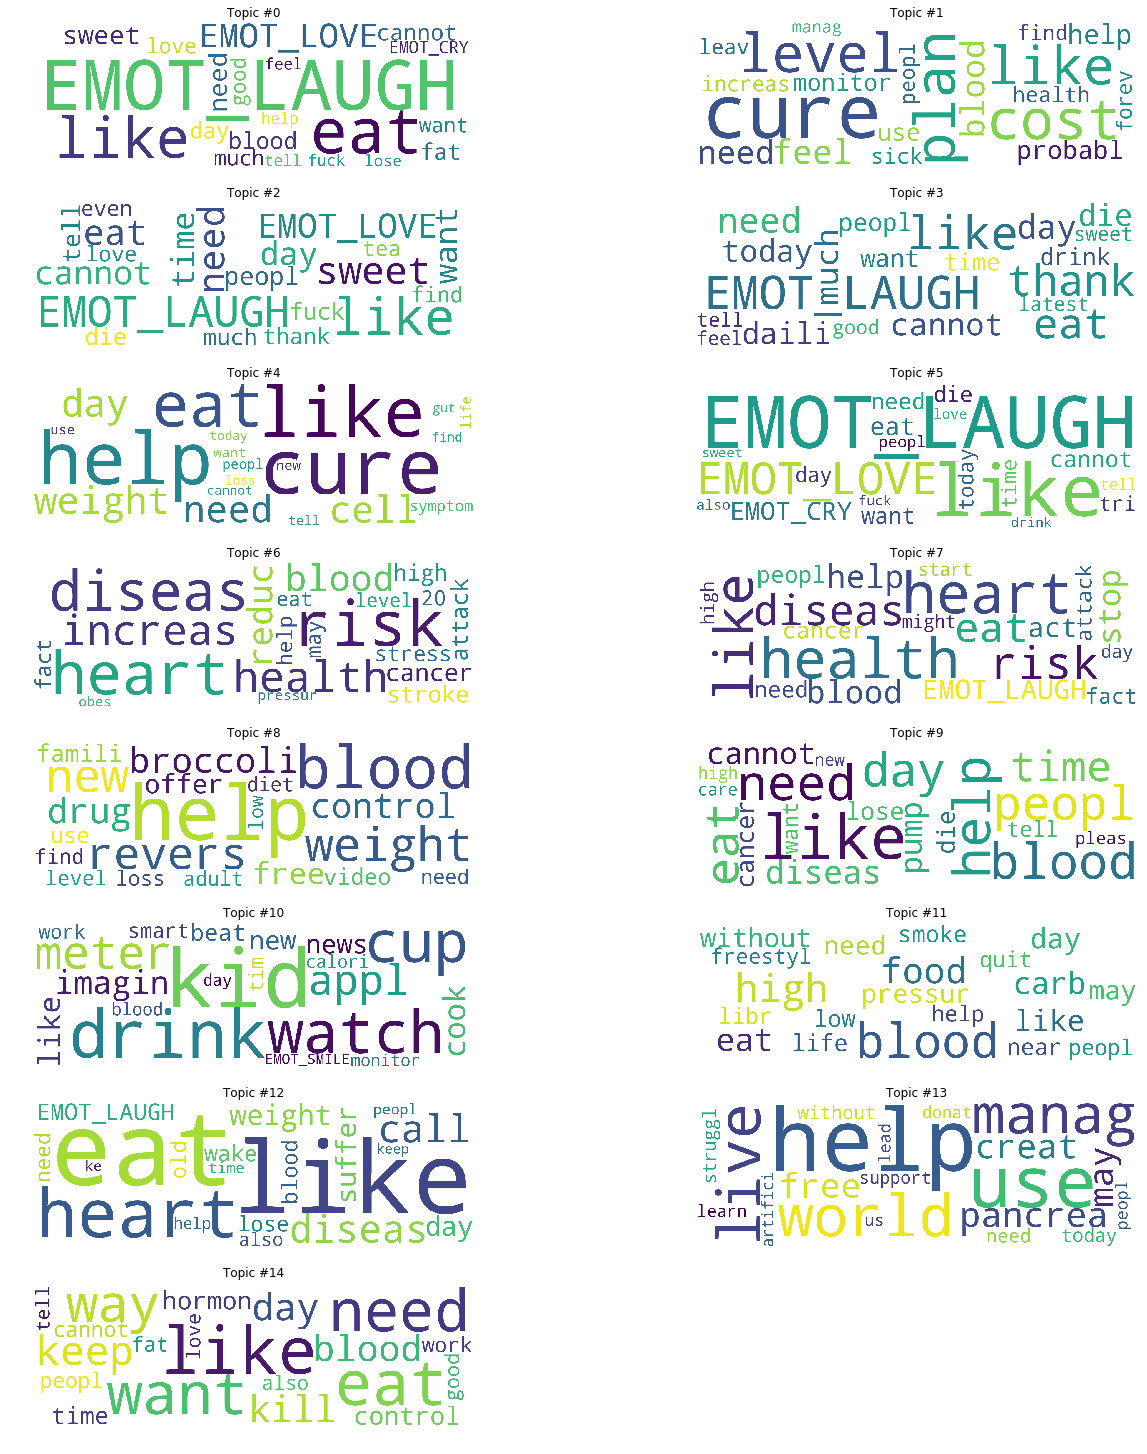

In [91]:
plt.figure(figsize=(20,20))


for t in range(K): 

    plt.subplot( int(K/2)+1, 2, t+1)
    plt.imshow(WordCloud(max_words=20, background_color="white", width = 1500, height=500).fit_words(dt[t]))
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.subplots_adjust(hspace=0.3, wspace=0)
plt.tight_layout(pad=0)
    
plt.show()

In [57]:
int(0/2)

0

In [25]:
import matplotlib.pyplot as plt

num_top_words = 10

fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus

for t in range(num_topics):
     plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
     plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
     plt.xticks([])  # remove x-axis markings ('ticks')
     plt.yticks([]) # remove y-axis markings ('ticks')
     plt.title('Topic #{}'.format(t))
     top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
     top_words_idx = top_words_idx[:num_top_words]
     top_words = mallet_vocab[top_words_idx]
     top_words_shares = word_topic[top_words_idx, t]
     for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
         plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base*share)
 

plt.tight_layout()


K:20, n(W):78937


In [35]:
voca

{0: 'im',
 1: 'idiot',
 2: 'buy',
 3: 'sandwich',
 4: 'later',
 5: '11am',
 6: 'automat',
 7: 'eat',
 8: 'ffs',
 9: 'head',
 10: 'feet',
 11: 'yah',
 12: 'happi',
 13: 'pizza',
 14: 'candi',
 15: 'anytim',
 16: 'want',
 17: 'gain',
 18: 'weight',
 19: 'exercis',
 20: 'everi',
 21: 'day',
 22: 'never',
 23: 'go',
 24: 'diet',
 25: 'EMOT_LAUGH',
 26: 'a1c',
 27: 'normal',
 28: 'rang',
 29: '5.6',
 30: 'take',
 31: 'hope',
 32: 'abl',
 33: 'reduc',
 34: 'elimin',
 35: 'rest',
 36: 'med',
 37: 'plannnng',
 38: 'bypass',
 39: 'dad',
 40: 'complain',
 41: 'biscuit',
 42: 'meiji',
 43: 'chocol',
 44: 'bless',
 45: 'yet',
 46: 'come',
 47: 'see',
 48: 'celebr',
 49: 'endors',
 50: 'donat',
 51: 'cystic',
 52: 'fibrosi',
 53: 'help',
 54: 'cancer',
 55: 'children',
 56: 'like',
 57: 'get',
 58: 'test',
 59: 'tell',
 60: 'need',
 61: 'know',
 62: 'nutrit',
 63: 'exam',
 64: '12.40',
 65: 'watch',
 66: 'lectur',
 67: 'first',
 68: 'time',
 69: 'honest',
 70: 'make',
 71: 'bite',
 72: 'ill',
 73: 

In [38]:
import inflect

a = ["a", "2", "df", "da", "2018", "3", "a", "4"]

somelist = [x for x in a if not x.isdigit() ]
print(somelist)

#p = inflect.engine()
#for ind, word in enumerate(a):
#    if word.isdigit():
#        #a[ind] = p.number_to_words(word)
#        a.remove(word)
#print(a)

['a', 'df', 'da', 'a']
